In [2]:
#keras : 딥러닝 모델을 훈련시키거나 모델을 로드하여 분류, 예측하는 프레임워크
#keras중 cnn: 딥러닝 알고리즘 중 이미지를 분류하고 인식하는데 효율적인 알고리즘 중 하나
#numpy : 행렬 연산을 가능하게 해주는 파이썬 라이브러리
#matplotlib : 수학적인 그래프를 그려주는 라이브러리 
#cnn개념

In [3]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')

In [4]:
#왼쪽
left_x_train = np.load('datas/np_data/left_x_train.npy').astype(np.float32)
left_y_train = np.load('datas/np_data/left_y_train.npy').astype(np.float32)
left_x_val = np.load('datas/np_data/left_x_val.npy').astype(np.float32)
left_y_val = np.load('datas/np_data/left_y_val.npy').astype(np.float32)

#오른쪽
right_x_train = np.load('datas/np_data/right_x_train.npy').astype(np.float32)
right_y_train = np.load('datas/np_data/right_y_train.npy').astype(np.float32)
right_x_val = np.load('datas/np_data/right_x_val.npy').astype(np.float32)
right_y_val = np.load('datas/np_data/right_y_val.npy').astype(np.float32) # astype(타입형태) 원하는 형태의 타입으로 변경(int, float)

print("왼쪽")
print(left_x_train.shape, left_y_train.shape)
print(left_x_val.shape, left_y_val.shape)

print("오른쪽")
print(right_x_train.shape, right_y_train.shape)
print(right_x_val.shape, right_y_val.shape)

왼쪽
(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)
오른쪽
(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


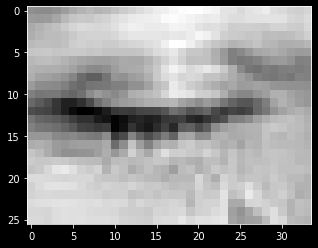

In [11]:
plt.imshow(left_x_train[105], cmap='gray')

In [12]:
left_y_train[105] #y는 라벨링 데이터 0(감은눈) 또는 1(뜬눈)

array([0.], dtype=float32)

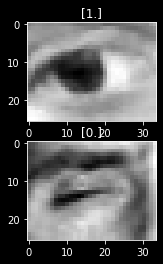

In [15]:
plt.subplot(2, 1, 1)
plt.title(str(left_y_train[0]))
plt.imshow(left_x_train[0].reshape((26, 34, 1)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(left_y_val[4]))
plt.imshow(left_x_val[4].reshape((26, 34, 1)), cmap='gray')


# Data Augmentation(데이터 증가)->훈련용 데이터를 증가시키고 성능을 향상시키기 위해 하는 방식

In [19]:
train_datagen = ImageDataGenerator(#가상의 이미지 데이터를 생성하는 것 why 훈련 성능 향상, 너무 훈련용데이터에만 적응하는 과적합을 막기 위해서도
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)
#과적합 : 과도하게 적합한 것을 의미, 너무 훈련을 잘해서 정해진 값만 정확하게 판단하려고 파라미터 값들을 맞추는 것.

val_datagen = ImageDataGenerator(rescale=1./255) #검증용은 굳이 변형이 필요없이 생성만

print("왼쪽")
left_train_generator = train_datagen.flow(
    x=left_x_train, y=left_y_train,
    batch_size=32, # 한 횟수의 훈련 및 검증에 사용될 데이터 량(32개씩)
    shuffle=True # 순서를 섞는것
)

left_val_generator = val_datagen.flow(
    x=left_x_val, y=left_y_val,
    batch_size=32,
    shuffle=False
)

print("오른쪽")
right_train_generator = train_datagen.flow(
    x=right_x_train, y=right_y_train,
    batch_size=32,
    shuffle=True
)

right_val_generator = val_datagen.flow(
    x=right_x_val, y=right_y_val,
    batch_size=32,
    shuffle=False
)

왼쪽
오른쪽


# Build Model cnn모델은 인풋레이어(인풋 정보 정의), 히든레이어(conv갯수에 따라 몇층인지), 아웃풋레이어(3차원데이터를 분류하기 편한 1차원으로 변경 및 활성화함수로 분류)

In [23]:
#왼쪽, 오른쪽 테이블 두개
inputs = Input(shape=(26, 34, 1)) #input층

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs) 
#convolutional 층을 쌓아 filter 크기(3*3), strides filter가 몇칸씩 이동하는지, padding same은 공간 정보 유지를 원한다.
#, activation 활성화함수 relu 음수 0, 양수는 그래도 표현
# ㄷㄷㄷㄷㄷ
# ㄷㅌㅌㅌㄷ    
# ㄷㅌㅌㅌㄷ -> 5*5 3*3
# ㄷㅌㅌㅌㄷ
# ㄷㄷㄷㄷㄷ
net = MaxPooling2D(pool_size=2)(net) #polling층 가장 자극이 강한 것만 다시 재추출하는 maxpolling, poll_size = 2
# 1  19   ---> 55
# 55 34

#1층 끝 보통 conv와 polling은 1개의 층으로 침

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)
#2층 끝

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)
#3층 끝

net = Flatten()(net) # 3차원데이터를 1차원으로 변경

net = Dense(512)(net)
net = Activation('relu')(net) #relu 음수면 0 양수면 1로 변경하는 활성화함수
net = Dense(1)(net)
outputs = Activation('sigmoid')(net) #결과를 도출하는 층, 활성화함수 sigmoid 사용 why 이진분류 if 다중분류 softmax 사용

left_model = Model(inputs=inputs, outputs=outputs)

left_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

left_model.summary()

right_model = Model(inputs=inputs, outputs=outputs)

right_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

right_model.summary()


Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 4, 128)       

# Train

In [26]:
model.fit_generator(
    left_train_generator, epochs=50, validation_data=left_val_generator,
    callbacks=[
        ModelCheckpoint('datas/models/left_eye.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

#epochs 훈련 루틴 횟수

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.0000
Epoch 00001: val_acc improved from -inf to 0.99306, saving model to datas/models/left_eye.h5
81/81 [==============================] - 5s 62ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0295 - val_acc: 0.9931
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.0064 - acc: 0.9981
Epoch 00002: val_acc did not improve from 0.99306
81/81 [==============================] - 5s 67ms/step - loss: 0.0064 - acc: 0.9981 - val_loss: 0.0281 - val_acc: 0.9931
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.0046 - acc: 0.9988
Epoch 00003: val_acc did not improve from 0.99306
81/81 [==============================] - 6s 77ms/step - loss: 0.0046 - acc: 0.9988 - val_loss: 0.0282 - val_acc: 0.9931
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9996
Epoch 00004: val_acc did not improve from 0.99306
81/81 [==============================] - 

Epoch 33/50
80/81 [============================>.] - ETA: 0s - loss: 0.0036 - acc: 0.9992
Epoch 00033: val_acc did not improve from 0.99306
81/81 [==============================] - 4s 46ms/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0303 - val_acc: 0.9931
Epoch 34/50
80/81 [============================>.] - ETA: 0s - loss: 0.0036 - acc: 0.9988
Epoch 00034: val_acc did not improve from 0.99306
81/81 [==============================] - 4s 44ms/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0315 - val_acc: 0.9931
Epoch 35/50
81/81 [==============================] - ETA: 0s - loss: 0.0059 - acc: 0.9977
Epoch 00035: val_acc did not improve from 0.99306
81/81 [==============================] - 4s 45ms/step - loss: 0.0059 - acc: 0.9977 - val_loss: 0.0309 - val_acc: 0.9931
Epoch 36/50
80/81 [============================>.] - ETA: 0s - loss: 0.0043 - acc: 0.9992
Epoch 00036: val_acc did not improve from 0.99306
81/81 [==============================] - 4s 47ms/step - loss: 0.0043 - acc: 0.99

In [27]:
model.fit_generator(
    right_train_generator, epochs=50, validation_data=right_val_generator,
    callbacks=[
        ModelCheckpoint('datas/models/right_eye.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.0741 - acc: 0.9799
Epoch 00001: val_acc improved from -inf to 0.98958, saving model to datas/models/right_eye.h5
81/81 [==============================] - 5s 63ms/step - loss: 0.0741 - acc: 0.9799 - val_loss: 0.0417 - val_acc: 0.9896
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.0597 - acc: 0.9841
Epoch 00002: val_acc did not improve from 0.98958
81/81 [==============================] - 6s 71ms/step - loss: 0.0597 - acc: 0.9841 - val_loss: 0.0411 - val_acc: 0.9896
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.0666 - acc: 0.9814
Epoch 00003: val_acc did not improve from 0.98958
81/81 [==============================] - 5s 66ms/step - loss: 0.0666 - acc: 0.9814 - val_loss: 0.0368 - val_acc: 0.9896
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss: 0.0575 - acc: 0.9845
Epoch 00004: val_acc did not improve from 0.98958
81/81 [==============================] -

test acc: 0.9930555555555556


<AxesSubplot:>

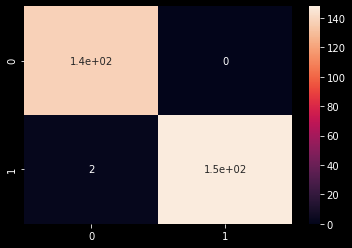

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = load_model('datas/models/left_eye.h5')

y_pred = model.predict(left_x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(left_y_val, y_pred_logical))
cm = confusion_matrix(left_y_val, y_pred_logical)
sns.heatmap(cm, annot=True)

test acc: 0.9965277777777778


<AxesSubplot:>

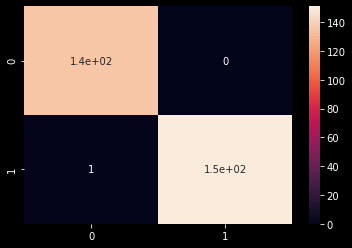

In [30]:
model = load_model('datas/models/right_eye.h5')

y_pred = model.predict(right_x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(right_y_val, y_pred_logical))
cm = confusion_matrix(right_y_val, y_pred_logical)
sns.heatmap(cm, annot=True)